# Social Media Analytics
## School of Information, University of Michigan

## Week 2: Visualizing and Modeling Patterns in Social Media Data
 
- Obtaining, loading, and overview of a large corpus
- Visualizing a tweet corpus temporally

## Assignment Overview
### The objective of this assignment is to:

- Process a large corpus of data from twitter
- Visualize the corpus temporally

### The total score of this assignment will be 100 points consisting of:

- `create_tweet_df` function: 5 points
- `create_tweet_count_df` function: 5 points
- `create_favorite_avg_df` function: 5 points
- `create_retweet_avg_df` function: 5 points
- `create_tweet_sum_viz` function: 10 points
- observations related to `create_tweet_sum_viz` function: 5 points
- `create_hashtag_df` function: 10 points
- `most_used_hashtags` function: 15 points
- `create_hashtag_viz` function: 15 points
- observations related to `create_hashtag_viz` function: 5 points
- `create_seasonal_decompose_plot` function: 15 points
- observations related to `create_seasonal_decompose_plot` function: 5 points

### Resources:

- [Tweepy API documentation](https://tweepy.readthedocs.io/en/latest/) 
- [Trump tweet corpus](https://www.thetrumparchive.com/) 

## Instructions: 

In this assignment, you will continue to use a Twitter corpus we provide to you. You will process the data and create temporal visualizations of the corpus. For each visualization, you will record observations about these data and their renderings. 

**Note:** Throughout many functions in this assignment, the [Pandas resample function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) is incredibly useful; it obviates many issues related to types and binning that could be introduced by other Pandas approaches.

**Note:** In previewing your data with print() statements, be mindful that displaying too much data can be problematic within any Jupyter Notebook environment.  If you are seeing an error message saying something like "data rate exceeded" when running a cell, it is likely caused by using print() for too large of a data set and we would suggest printing only a sample of the data instead.

In [1]:
import json
import os
import pandas as pd

def create_tweet_df():
    """
    5 points
    Use all the json files in the folder assets/trump_data_archive/
    The dataframe must have the following columns:
        'retweet_count', int
        'created_at', datetime
        'text', object
        'favorited', bool
        'retweeted', bool
        'lang', object
        'favorite_count', int 
        
    Note that some time in 2017, Twitter seems to have switched from suppling the 
    'text' field to the 'full_text' field. This kind of thing happens when you're dealing
    with data supplied by someone else.
    In your dataframe, make sure 'text' column has data from either 'text' or 'full_text', whichever
    is present. Otherwise, when you compute counts later on in this assignment, you will find that
    the counts are all 0 after a certain date.
    """
    
    json_2009 = pd.read_json('assets/trump_data_archive/master_2009.json')
    json_2010 = pd.read_json('assets/trump_data_archive/master_2010.json')
    json_2011 = pd.read_json('assets/trump_data_archive/master_2011.json')
    json_2012 = pd.read_json('assets/trump_data_archive/master_2012.json')
    json_2013 = pd.read_json('assets/trump_data_archive/master_2013.json')
    json_2014 = pd.read_json('assets/trump_data_archive/master_2014.json')
    json_2015 = pd.read_json('assets/trump_data_archive/master_2015.json')
    json_2016 = pd.read_json('assets/trump_data_archive/master_2016.json')
    json_2017 = pd.read_json('assets/trump_data_archive/master_2017.json')

    temp_df = pd.concat([json_2009, json_2010, json_2011, json_2012, json_2013, 
                         json_2014, json_2015, json_2016, json_2017])
    
    tweets_df = temp_df[['retweet_count', 'created_at', 'text', 'favorited', 'retweeted', 'lang', 'favorite_count']]
    tweets_df.text.fillna(temp_df.full_text, inplace=True)
        
    return tweets_df


In [2]:
import json
import pandas as pd
import os
import numpy as np

df = create_tweet_df()
df_length = 32797
assert len(df) == df_length, "create_tweet_df, the length of the dataframe should be %d" % df_length
df_cols = ['retweet_count', 'created_at','favorited','text', 'favorite_count','retweeted','lang']
for col_name in df_cols:
    assert col_name in df.columns.values, "create_tweet_df, the column %s should be included" % col_name

## Using the functions below, you will be recreating the visualizations displayed here:
<img src="assets/example_plot_2.png" alt="three bar charts plotting tweet count, average number of favorites, and average number of retweets over time" style="width: 1000px;"/>

In [3]:
import pandas as pd

# 15 points if you pass the tests for all three of these functions

def create_tweet_count_df(tweets_df):
    """ 
    Create a dataframe with the count of tweets each month
    The dataframe must have the following columns:
        'count', int, the number of tweets created each month
        'created_at', datetime, the date at which tweets were created
    See tests in the next cell to see what the first row should contain.
    HINT: see note at top of notebook
    """
    tweets_df['count'] = 1
    t_count = tweets_df[['created_at', 'count']].set_index('created_at').resample('M').sum().reset_index()
    
    return t_count

def create_favorite_avg_df(tweets_df):
    """ 
    Create a dataframe with the average of favorites of tweets created each month
    The dataframe must have the following columns:
        'favorite avg', int, the average of favorites of all of the tweets created each month
        'created_at', datetime, the date at which tweets were created
    HINT: see note at top of notebook
    """
    tweets_df['favorite avg'] = tweets_df['favorite_count']
    t_fav = tweets_df[['created_at', 'favorite avg']].set_index('created_at').resample('M').mean().reset_index()

    return t_fav

def create_retweet_avg_df(tweets_df):
    """ 
    Create a dataframe with the average of retweets of the tweets created each month
    The dataframe must have the following columns:
        'retweet avg', int, the average of retweets of all of the tweets created each month
        'created_at', datetime, the date at which tweets were created
    HINT: see note at top of notebook
    """
    tweets_df['retweet avg'] = tweets_df['retweet_count']
    t_rt = tweets_df[['created_at', 'retweet avg']].set_index('created_at').resample('M').mean().reset_index()
    
    return t_rt

In [4]:
import json
import pandas as pd
import os
import datetime

t_df = create_tweet_df()
t_count = create_tweet_count_df(t_df)

# check that the first row of t_count is for "2009-05-31 00:00:00+00:00" with count of 21
assert t_count.loc[0,'created_at'].date() == datetime.date(2009, 5, 31)
assert t_count.loc[0,'count'] == 21

t_fav = create_favorite_avg_df(t_df)
t_rt = create_retweet_avg_df(t_df)

df_length = 105
assert len(t_count) == df_length, "create_tweet_count_df, the length of the dataframe should be %d" % df_length
assert len(t_fav) == df_length, "create_favorite_avg_df, the length of the dataframe should be %d" % df_length
assert len(t_rt) == df_length, "create_retweet_avg_df, the length of the dataframe should be %d" % df_length

for tup in [(t_count, "create_tweet_count_df"), (t_fav, "create_favorite_avg_df"), (t_rt, "create_retweet_avg_df")]:
    assert 'created_at' in tup[0].columns.values, "%s, the column created_at should be included" % tup[1]

assert 'count' in t_count.columns.values, "create_tweet_count_df, the column count should be included"
assert 'favorite avg' in t_fav.columns.values, "create_favorite_avg_df, the column favorite avg should be included"
assert 'retweet avg' in t_rt.columns.values, "create_retweet_avg_df, the column retweet avg should be included"


In [5]:
import pandas as pd
import altair as alt 
import json
import os
import pandas as pd

def create_tweet_sum_viz(t_count,t_rt,t_fav):
    """
    10 points
    Create the visualization shown above
    Use the tweet_df dataframe
    """
    
    chart1 = alt.Chart(t_count).mark_bar() \
                .encode(x = 'created_at:T',
                        y = 'count:Q') \
                .properties(width=250,height=250)

    chart2 = alt.Chart(t_rt).mark_bar() \
                .encode(x = 'created_at:T',
                        y = 'retweet avg:Q') \
                .properties(width=250,height=250)

    chart3 = alt.Chart(t_fav).mark_bar() \
                .encode(x = 'created_at:T',
                        y = 'favorite avg:Q') \
                .properties(width=250,height=250)

    chart = chart1 | chart2 | chart3
    display(chart)

df = create_tweet_df()
t_count = create_tweet_count_df(t_df)
t_fav = create_favorite_avg_df(t_df)
t_rt = create_retweet_avg_df(t_df)
create_tweet_sum_viz(t_count,t_rt,t_fav)

alt.HConcatChart(...)

Looking at the graphs you have produced, please make observations about the tweet frequency and popularity of the former president in the cell below. (5 points)

In regards to the number of tweets, the highest frequency was seen leading up to his presidential run (2014 - 2016). When Trump was in office, his tweet count did decrease but was still higher than what was seen in the earlier years of Twitter (2009 - 2012). IN regards to retweet count and favorite count, it's clear that following his election to office in 2016, Trump's popularity on Twitter skyrocketed, with a substantial increase in retweets and favorites from 2015 - 2018 when compared to the earlier time periods.

In [6]:
import json
import os
import pandas as pd

def create_hashtag_df():
    """ 
    10 points
    Use the json files on the folder assets/trump_data_archive/
    The dataframe must have the following columns:
        'text', string, the text of the hashtag
        'created_at', datetime, the time the hashtag was tweeted
        
    If there is more than one hashtag for a single tweet, create one row in the
    dataframe for each hashtag, with the same 'created_at' timestamp for all of them.
    
    HINT: use the 'hashtags' attribute in the 'entities' attribute of the tweets
    """ 
    json_2009 = pd.read_json('assets/trump_data_archive/master_2009.json')
    json_2010 = pd.read_json('assets/trump_data_archive/master_2010.json')
    json_2011 = pd.read_json('assets/trump_data_archive/master_2011.json')
    json_2012 = pd.read_json('assets/trump_data_archive/master_2012.json')
    json_2013 = pd.read_json('assets/trump_data_archive/master_2013.json')
    json_2014 = pd.read_json('assets/trump_data_archive/master_2014.json')
    json_2015 = pd.read_json('assets/trump_data_archive/master_2015.json')
    json_2016 = pd.read_json('assets/trump_data_archive/master_2016.json')
    json_2017 = pd.read_json('assets/trump_data_archive/master_2017.json')

    tweets_df = pd.concat([json_2009, json_2010, json_2011, json_2012, json_2013, 
                           json_2014, json_2015, json_2016, json_2017])
    
    df_list = []
    for i in range(len(tweets_df)): 
        if len(tweets_df.iloc[i]['entities']['hashtags']) > 0:
            for j in range(len(tweets_df.iloc[i]['entities']['hashtags'])):
                tweet_list = [tweets_df.iloc[i]['entities']['hashtags'][j]['text'], tweets_df.iloc[i]['created_at']]
                df_list.append(tweet_list)

    hashtag_df = pd.DataFrame(df_list, columns = ['text', 'created_at']) 
    
    return hashtag_df

In [7]:
import json
import pandas as pd
import os

df = create_hashtag_df()
df_length = 6650
assert len(df) == df_length, "create_hashtag_df, the length of the dataframe should be %d" % df_length
df_cols = ['text','created_at']
for col_name in df_cols:
    assert col_name in df.columns.values, "create_hashtag_df, the column %s should be included" % col_name
df_pairs = 6638
assert len(df[df_cols].drop_duplicates()) == df_pairs, "create_hashtag_df, incorrect number of hashtag-timestamp pairs, should be %d" % df_pairs


In [8]:
import pandas as pd

def most_used_hashtags(n, hashtag_df):
    """ 
    15 points
    Create a dataframe with the n most used hashtags overall and how many times they were used each month
    The dataframe must have the following columns:
        'hashtag', string, the text of the hastag
        'created_at', datetime, the time the hashtag was tweeted
        'count', int, the times the hastag was used each month
    HINT: see note at top of notebook
    """
    
    most_used = hashtag_df.groupby(['text']).count().nlargest(n, 'created_at').reset_index().text.tolist()
    hashtag_df_restricted = hashtag_df[hashtag_df['text'].isin(most_used)]
    hashtag_df_restricted['count'] = 1
    top_df = hashtag_df_restricted.set_index('created_at').groupby('text').resample('M').sum().reset_index()
    
    top_df['hashtag'] = top_df['text']
    top_df = top_df[['hashtag', 'created_at', 'count']]
    
    return top_df

In [9]:
import json
import pandas as pd
import os

df = create_hashtag_df()
m_df = most_used_hashtags(10, df)
df_length = 320
assert len(m_df) == df_length, "most_used_hashtags, the length of the dataframe should be %d" % df_length
df_cols = ['count','hashtag','created_at']
for col_name in df_cols:
    assert col_name in m_df.columns.values, "most_used_hashtags, the column %s should be included" % col_name

### Create the following visualization (15 points) and write any observations about the plot (5 points).
<img src="assets/example_plot_1.png" alt="Drawing" style="width: 500px;"/>

In [10]:
import pandas as pd
import altair as alt 
import json
import os
import pandas as pd

def create_hashtag_viz(most_used_hashtags):
    """
    15 points
    Create the visualization shown above using the top 10 hashtags
    Use the most_used_hashtags dataframe
    """
    
    chart = alt.Chart(most_used_hashtags).mark_line() \
               .encode(x = 'created_at:T',
                       y = 'count:Q',
                       color = 'hashtag:N') \
               .properties(width=500,height=300)
    
    display(chart)

df = create_hashtag_df()
m_df = most_used_hashtags(10, df)
create_hashtag_viz(m_df)

alt.Chart(...)

This visualization aligns with what I would have expected with Trump's hashtag usage. Prior to any presidential campaigning, his focus from 2012 - 2015 was on his own personal ventures such as Celebrity Apprentice. Significant hashtag usage spikes for these events may signal season finales or other notable segments of the show. However, beginning in 2015 and onward you begin to see a lot of hashtag usage focused around obtaining votes and delivering campaign slogans like Drain the Swamp and MAGA. The campaign slogans do continue throughout hsi presidency but were most prevalent around 2016 during the election year.

### Create the following visualization (15 points) and write any observations about the plot (5 points) relating to the seasonal decomposition of tweet count.
<img src="assets/example_plot_3_a.png" alt="Drawing" style="width: 500px;"/>
<img src="assets/example_plot_3_b.png" alt="Drawing" style="width: 500px;"/>

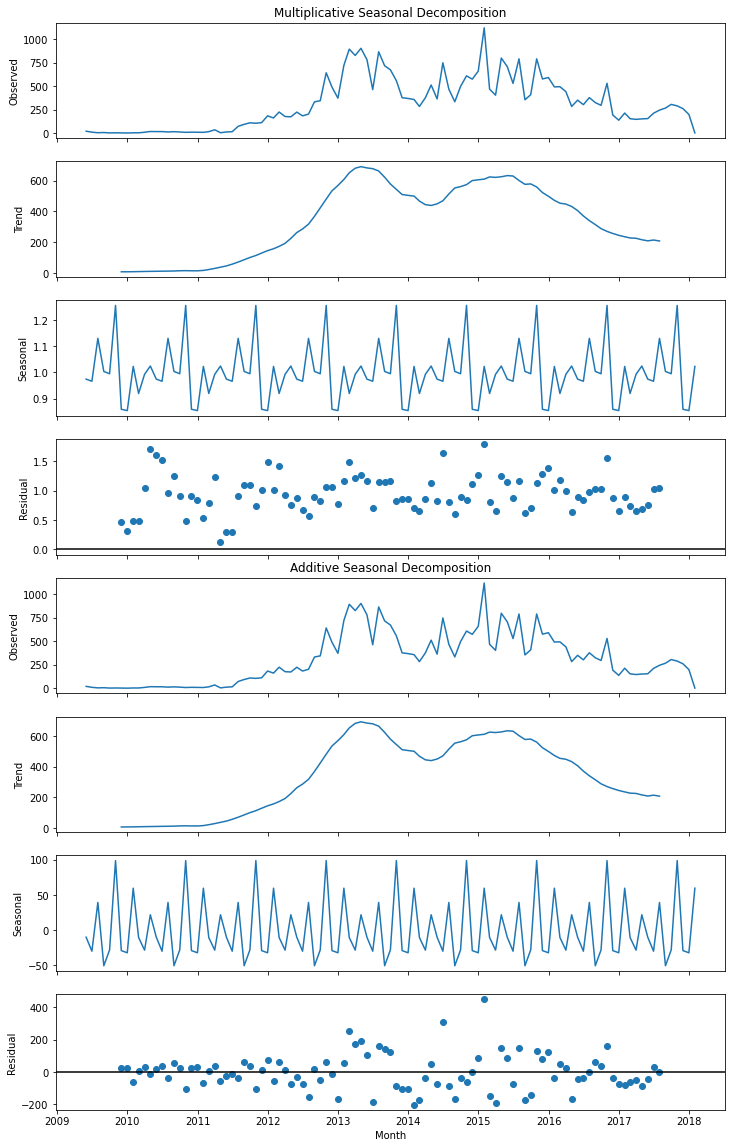

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def create_seasonal_decompose_plot(t_count):
    """
    15 points
    Create a visualization for the seasonal decomposition of the twitter count series
    Create a plot for a decomposition using a multiplicative and a plot for a decomposition using an additive model
    Use the seasonal_decompose function of statsmodels.tsa.seasonal to decompose and the plot
    method of the resulting object
    """
    s = t_count.set_index('created_at')

    seasonal_multi = seasonal_decompose(s, model = 'multiplicative')
    seasonal_add = seasonal_decompose(s, model = 'additive')

    fig, axes = plt.subplots(8, 1, figsize=(12, 20), sharex=True)

    axes[0].plot(seasonal_multi.observed)
    axes[0].set_ylabel("Observed")
    axes[0].set_title("Multiplicative Seasonal Decomposition")

    axes[1].plot(seasonal_multi.trend)
    axes[1].set_ylabel("Trend")

    axes[2].plot(seasonal_multi.seasonal)
    axes[2].set_ylabel("Seasonal")

    axes[3].scatter(seasonal_multi.resid.index, seasonal_multi.resid)
    axes[3].axhline(y=0, color='black')
    axes[3].set_ylabel("Residual")

    axes[4].plot(seasonal_add.observed)
    axes[4].set_ylabel("Observed")
    axes[4].set_title("Additive Seasonal Decomposition")

    axes[5].plot(seasonal_add.trend)
    axes[5].set_ylabel("Trend")

    axes[6].plot(seasonal_add.seasonal)
    axes[6].set_ylabel("Seasonal")

    axes[7].scatter(seasonal_add.resid.index, seasonal_add.resid)
    axes[7].axhline(y=0, color='black')
    axes[7].set_ylabel("Residual")
    axes[7].set_xlabel('Month')
    
    return plt.show()
    
t_df = create_tweet_df()
t_count = create_tweet_count_df(t_df)
create_seasonal_decompose_plot(t_count)

The Trend from both the multiplicative and additive models for seasonal decomposition help smooth out the data enough to clearly display two clear tweeting "peaks", with one being, expectedly, right around election time in 2016. Overall, the trend allows the data user to see a clear ramp up in tweets leading up to Celebrity Apprentice and the 2016 election and a clear decrease in tweets following Trump's election. In regards to seasonality, again both the additive and multiplicative models did pick up on different levels of tweeting at certain parts of the year, with the highest occuring usually at the end of the year. However, the residual plots for both models do show that there is still more to "account" for beyond just seasonality and trends when determining Trump's tweet counts throughout time as a "perfect" account would show a far greater amount of data points with zero residual.